<a href="https://colab.research.google.com/github/LuisRobles18/NLP/blob/main/Homework_3_Luis_Alberto_Robles_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 3**
**Student ID:** 002581393 **Name:** Luis Alberto Robles Hernandez

**Github repository:** https://github.com/LuisRobles18/NLP/blob/main/Homework_3_Luis_Alberto_Robles_Hernandez.ipynb

##**INSTRUCTIONS**

Questions **(150 total points)**

**NOTE:** You can only use Python’s built-in regular functions, scikit-learn as your ML library for these exercises, NLTK as your NLP library. Any code using any other ML or NLP libraries will not be graded. Note: You can use pandas and/or numpy as these are NOT machine learning libraries

###**REQUIREMENTS**
Using the Cornell Movie Review data (http://www.cs.cornell.edu/people/pabo/movie-review-data/) use the polarity_dataset V2.0 and write the following pieces of code:

In [1]:
from IPython.display import clear_output
import tarfile
import zipfile
#Downloading the polarity dataset from the Cornell Movie Review data
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz -O review_polarity.tar.gz
clear_output()

#Converting Gzip file to zip file
#The reason to convert it to Zip file, is because python gzip module is not able to read the filenames inside the
#file (without extracting them). Converting it to a ZIP file will allow to know the path of each file inside it and to
#separate the files (one from the "pos folder", and the other one from the "neg" folder)
tar_file = tarfile.open( name='review_polarity.tar.gz', mode='r|gz' )
zip_file = zipfile.ZipFile( file='review_polarity.zip', mode='a', compression=zipfile.ZIP_DEFLATED)
for m in tar_file:
    f = tar_file.extractfile(m)
    fl = f.read()
    fn = m.name
    zip_file.writestr(fn, fl)
tar_file.close()
zip_file.close()

##**EXERCISE 1**

**1. (30 points)** Using NLTK tokenize all documents, separated by polarity, [remove stop words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/), and list the top 20 most frequent tokens (and their counts) for the positive reviews, and the top 20 most frequent tokens (and their counts).

### **IMPORTANT NOTE:** There are some issues when dealing with contractions (like it's, don't, aren't,etc). To fix this issue, I made an improved version to remove stopped words in an efficient way (even better than the one from GeeksForGeeks website). The improved version is already implemented in this exercise. Here's a colab notebook showing the performance between the one from GeeksForGeeks website and the improved version (just for reference): https://colab.research.google.com/drive/1Oi19FSo1oeU7DNeMBw3reXh7GMrw-iip?usp=sharing

In [2]:
import gzip
import zipfile
import nltk
import os
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from IPython.display import display_html
import re

#All the files will be stored in an array
#The first part of the array will be for negative reviews
#The second part of array will be for positive reviews
data_reviews = []
documents_filename = []
#These two lines will be used for the next exercise
#In order to avoid running the same part of the following code
target = []
target_names = ["negative_reviews","positive_reviews"]

#Openning the dataset ZIP file and extracting the polarity reviews
my_zip = zipfile.ZipFile('review_polarity.zip')
storage_path = '.'

for file in my_zip.namelist():
    #We will extract the negative reviews first to the data_reviews variable
    if file.startswith('txt_sentoken/neg/') and file.endswith('.txt'):
        documents_filename.append(os.path.basename(my_zip.getinfo(file).filename))
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            data_reviews.append(doc.read().decode())
            #This will be used for the next exercise. For negative reviews, the value for the target will be 0
            target.append(0)

for file in my_zip.namelist():
    #Then we will extract the positive reviews to the data_reviews variable
    if file.startswith('txt_sentoken/pos/') and file.endswith('.txt'):
        documents_filename.append(os.path.basename(my_zip.getinfo(file).filename))
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            data_reviews.append(doc.read().decode())
            #This will be used for the next exercise. For positive reviews, the value for the target will be 1
            target.append(1)

#In this process we improve our data obtained
#This process involves mainly added an extra space after a punctuation mark (if it doesn't have any)...
#...so the words are correctly separeted, and correctly identified when using the split() function
#The reason to perform this is that some stop words, won´t be deleted correctly using NTLK tokenizer
#For example, the result for "it's" would leave only the "'s". That's why this previous process is done to avoid those cases.

end_punct = [']',')','!','?',';',':','.','"',',']
new_end_punct = ['] ',') ','! ','? ','; ',': ','. ','" ',', ']
data_reviews_f = [None] * len(data_reviews)

for i in range(len(data_reviews)):
    for j in range(len(end_punct)):
        if end_punct[j] in data_reviews[i]:
            data_reviews_f[i] = data_reviews[i].replace(end_punct[j], new_end_punct[j])
    #Removes extra whitespaces to ensure theres only one space between words
    data_reviews_f[i] = re.sub(' +', ' ', data_reviews_f[i])


#Deleting all the stop words from the polarity reviews using the split() function
stop_words = set(stopwords.words('english'))

for i in range(len(data_reviews)):
    words = data_reviews_f[i].split()  
    resultwords  = [word for word in words if word.lower() not in stop_words]
    data_reviews_f[i] = ' '.join(resultwords)

clear_output()

#We will delete the remaining stopwords function using NTLK by splitting the text in tokens
#NOTE: Words and tokens are different
filtered_text = []
#We will store all the tokens from the negative reviews in the following variable
filtered_text_negative = []
#We will store all the tokens from the postive reviews in the following variable
filtered_text_positive = []
#This variable will be used for the BONUS exercise
data_reviews_t = []
for i in range(len(data_reviews_f)):
    #We convert the text to lowercase because the stopwords set is written in lowercase
    word_tokens = word_tokenize(data_reviews_f[i].lower())
    filtered_text = [w for w in word_tokens if not w in stop_words]  
    data_reviews_t.append(filtered_text)
    
    for j in range(len(filtered_text)):
        #The first half (1000 items) contains negative reviews
        if i < 1000:
            filtered_text_negative.append(filtered_text[j])
        #The other half (1000 items) contains positive reviews
        else:
            filtered_text_positive.append(filtered_text[j])

#Obtaining the TOP 20 most frequent tokens (positive and negative reviews)

#Counting the unique tokens for the negative reviews
unique_negative_tokens = {}
for i in range(len(filtered_text_negative)):
    if (filtered_text_negative[i] in unique_negative_tokens):
        unique_negative_tokens[filtered_text_negative[i]] +=1
    else:
        unique_negative_tokens[filtered_text_negative[i]] = 1

#Counting the positive tokens for the positive reviews
unique_positive_tokens = {}
for i in range(len(filtered_text_positive)):
    if (filtered_text_positive[i] in unique_positive_tokens):
        unique_positive_tokens[filtered_text_positive[i]] +=1
    else:
        unique_positive_tokens[filtered_text_positive[i]] = 1

#Sorting in descending mode the tokens by frequency
unique_negative_tokens_desc = {k: v for k, v in sorted(unique_negative_tokens.items(), 
                                                       key=lambda item: item[1], reverse=True)}

#Sorting in descending mode the tokens by frequency
unique_positive_tokens_desc = {k: v for k, v in sorted(unique_positive_tokens.items(), 
                                                       key=lambda item: item[1], reverse=True)}


df_negative = pd.DataFrame(columns=['Token','Frequency'])
df_positive = pd.DataFrame(columns=['Token','Frequency'])

#Getting and showing the top 20 negative tokens
top_20_negative_tokens = []

current_iteration = 0
for k, v in unique_negative_tokens_desc.items():
    if current_iteration < 20:
        df_negative.loc[len(df_negative), :] = [k,v]
        current_iteration +=1
    else:
        break

#Getting and showing the top 20 positive tokens
top_20_positive_tokens = []

current_iteration = 0
for k, v in unique_positive_tokens_desc.items():
    if current_iteration < 20:
        df_positive.loc[len(df_positive), :] = [k,v]
        current_iteration +=1
    else:
        break


#Some styling process to show both tables in the same line
print("\033[1mTOP 20 most frequent tokens (excluding stop words) \033[0m \n")
df_negative_style = df_negative.style.set_table_attributes("style=display:inline").set_caption("Negative Reviews")
df_positive_style = df_positive.style.set_table_attributes("style=display:inline").set_caption("Positive Reviews")
display_html(df_negative_style._repr_html_()+df_positive_style._repr_html_(), raw=True)

TOP 20 most frequent tokens (excluding stop words)  



,Token,Frequency
0,",",35269
1,.,32162
2,``,9123
3,'s,6624
4,),5742
5,(,5650
6,film,4257
7,movie,3174
8,one,2637
9,?,2201


**What kind of things do you notice are different between the two sets?** The dataset from the negative reviews have more "bad" words comparing to the positive review dataset, this is obvious because we expect this kind of adjectives for the negatives reviews since that word is usually used when describing something of poor quality. In the other hand, we see that the word "good" was slighty more used in the positive reviews dataset than in the negative reviews dataset for the same reason, that kind of adjective seems to be more commonly used when describing something positive, although we can expect also to describe something negative but possibly a little less common (For example: "This movie wasn't good")

We also notice that the word "like" was slighty more used in negative reviews that in positive reviews. This could mean that before this word, there could be some negative words like "don't", for example: "I didn't like this film".

Additionally, we also notice that the word "story" was more used in positive reviews than in negative reviews. This could mean that many positive reviews from the dataset talks about how good was the story from the film.

##**EXERCISE 2**

**2. (20 points)** Using the code from previous lectures, build 3 polarity classifiers using the following parameters. **Note: just train the models.**

a) For **training**: use 50% of the positive dataset and 70% of the negative dataset. For your model use: NaiveBayes with the TF-IDF vectorizer.

b) For **training**: use 50% of the negative dataset and 70% of the positive dataset. For your model use: NaiveBayes with the TF-IDF vectorizer.

c) For **training**: use 25% of the negative dataset and 25% of the positive dataset. For your model use: SVM with the TF-IDF vectorizer.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from IPython.display import clear_output

length_data = len(data_reviews)
length_target = len(target)
middle_index_data = length_data//2
middle_index_target = length_target//2


#Negative reviews data and target
first_half_data = data_reviews[:middle_index_data]
first_half_target = target[:middle_index_target]

#Positive reviews data and target
second_half_data = data_reviews[middle_index_data:]
second_half_target = target[middle_index_target:]


#================ MODEL A ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 70% negative and 50% positive
#% of Testing = 30% negative and 50% positive

model_a_negative_training_data, model_a_negative_test_data, model_a_negative_training_target, model_a_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.30, random_state = 12345)
model_a_positive_training_data, model_a_positive_test_data, model_a_positive_training_target, model_a_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.50, random_state = 12345)
#We join both training and test data from positive and negative reviews
model_a_training_data = model_a_negative_training_data + model_a_positive_training_data
model_a_training_target = model_a_negative_training_target + model_a_positive_training_target
model_a_test_data = model_a_negative_test_data + model_a_positive_test_data
model_a_test_target = model_a_negative_test_target + model_a_positive_test_target

model_a = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_a.fit(model_a_training_data, model_a_training_target)

#================ MODEL B ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 50% negative and 70% positive
#% of Testing = 50% negative and 30% positive

model_b_negative_training_data, model_b_negative_test_data, model_b_negative_training_target, model_b_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.50, random_state = 12345)
model_b_positive_training_data, model_b_positive_test_data, model_b_positive_training_target, model_b_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.30, random_state = 12345)
#We join both training data from positive and negative reviews
model_b_training_data = model_b_negative_training_data + model_b_positive_training_data
model_b_training_target = model_b_negative_training_target + model_b_positive_training_target
model_b_test_data = model_b_negative_test_data + model_b_positive_test_data
model_b_test_target = model_b_negative_test_target + model_b_positive_test_target

model_b = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_b.fit(model_b_training_data, model_b_training_target)

#================ MODEL C ===================
print("Building SVM Model using TF-IDF...")
#Model = Support Vector Machines (TF-IDF)
#% of Training = 25% negative and 25% positive
#% of Testing = 75% negative and 75% positive

model_c_negative_training_data, model_c_negative_test_data, model_c_negative_training_target, model_c_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.25, random_state = 12345)
model_c_positive_training_data, model_c_positive_test_data, model_c_positive_training_target, model_c_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.25, random_state = 12345)
#We join both training data from positive and negative reviews
model_c_training_data = model_c_negative_training_data + model_c_positive_training_data
model_c_training_target = model_c_negative_training_target + model_c_positive_training_target
model_c_test_data = model_c_negative_test_data + model_c_positive_test_data
model_c_test_target = model_c_negative_test_target + model_c_positive_test_target

model_c = make_pipeline(TfidfVectorizer(), SVC())
model_c.fit(model_c_training_data, model_c_training_target)

print("Done!")

Building Multinomial NB Model using TF-IDF...
Building Multinomial NB Model using TF-IDF...
Building SVM Model using TF-IDF...
Done!


##**EXERCISE 3**

**3. (15 points)** Using the models from question 2, evaluate them on their individual rest of the dataset. This is, for:

a) 50% positive and 30% negative.

b) 50% negative and 30% positive.

c) 75% negative and 75% positive. 

Calculate and show ONLY the following metrics for each model: Accuracy, Precision, Recall, Macro F1-score.

In [4]:
import sklearn
import pandas as pd

df = pd.DataFrame(columns=['Model Name','Accuracy','Precision','Recall','Macro F1-Score'])

print("Evaluating and getting metrics from model A (Multinomial NB TF-IDF)...")
#====== Model A - Multinomial NB TF-IDF (METRICS) ============
model_a_labels = model_a.predict(model_a_test_data)
model_a_accuracy = sklearn.metrics.accuracy_score(model_a_test_target,model_a_labels)
model_a_precision = sklearn.metrics.precision_score(model_a_test_target,model_a_labels)
model_a_recall = sklearn.metrics.recall_score(model_a_test_target,model_a_labels)
model_a_f1 = sklearn.metrics.f1_score(model_a_labels, model_a_test_target, average='macro')

model_a_metrics = ['Model A - Multinomial NB (TF-IDF)',model_a_accuracy,model_a_precision,model_a_recall,model_a_f1]

print("Evaluating and getting metrics from model B (Multinomial NB TF-IDF)...")
#====== Model B - Multinomial NB TF-IDF (METRICS) ============
model_b_labels = model_b.predict(model_b_test_data)
model_b_accuracy = sklearn.metrics.accuracy_score(model_b_test_target,model_b_labels)
model_b_precision = sklearn.metrics.precision_score(model_b_test_target,model_b_labels)
model_b_recall = sklearn.metrics.recall_score(model_b_test_target,model_b_labels)
model_b_f1 = sklearn.metrics.f1_score(model_b_labels, model_b_test_target, average='macro')

model_b_metrics = ['Model B - Multinomial NB (TF-IDF)',model_b_accuracy,model_b_precision,model_b_recall,model_b_f1]

print("Evaluating and getting metrics from model C (SVM TF-IDF)...")
#====== Model C - SVM TF-IDF (METRICS) ============
model_c_labels = model_c.predict(model_c_test_data)
model_c_accuracy = sklearn.metrics.accuracy_score(model_c_test_target,model_c_labels)
model_c_precision = sklearn.metrics.precision_score(model_c_test_target,model_c_labels)
model_c_recall = sklearn.metrics.recall_score(model_c_test_target,model_c_labels)
model_c_f1 = sklearn.metrics.f1_score(model_c_labels, model_c_test_target, average='macro')

model_c_metrics = ['Model C - SVM (TF-IDF)',model_c_accuracy,model_c_precision,model_c_recall,model_c_f1]

print("Done! \n")

#Adding the previous metrics to a dataframe

df.loc[len(df), :] = model_a_metrics
df.loc[len(df), :] = model_b_metrics
df.loc[len(df), :] = model_c_metrics

df

Evaluating and getting metrics from model A (Multinomial NB TF-IDF)...
Evaluating and getting metrics from model B (Multinomial NB TF-IDF)...
Evaluating and getting metrics from model C (SVM TF-IDF)...
Done! 



,Model Name,Accuracy,Precision,Recall,Macro F1-Score
0,Model A - Multinomial NB (TF-IDF),0.37625,1,0.002,0.274971
1,Model B - Multinomial NB (TF-IDF),0.375,0.375,1,0.272727
2,Model C - SVM (TF-IDF),0.828,0.825397,0.832,0.827997


## **EXERCISE 4**

**4. (40 points)** Using the model performance metrics from question 3, answer the following questions. Please provide logical and intuitive rationale for your answers, simple answers like: ***because it has the best score***, will not be sufficient:

**a) What is the best performing model?** The best performing model is the Model C (SVM with TF-IDF)

**b) Why do you think this is the best performing model?** Because their classes are well balanced (25% for each class, and as we know, the classifier tries to guess the majority class, in which it is not seen for model C) and because that model has a high accuracy score. That means that when predicting a text using this model, the probability to labeling it correctly will be higher comparing to the other two models (A and B).

**c) How does class imbalance play in determining polarity?** This case was seen in the first two models: A and B. 

In the first one (Model A), the training data had more negative reviews, and this led to have a perfect precision, that is, the model (in theory) would be able to NOT label as positive a sample that is negative. However, the Recall is very low, almost 0, which means that the model would do a very bad job when finding positive samples.

In the second model (Model B) we see the contrary compared to Model A, the training data had more positive reviews, and this led to have a very low precision, that is, the model would do a very bad job when NOT labeling as positive a sample that is negative. In the other side, the recall had a perfect precision score, which means that, in theory, the model will be able to find all positive samples.

Having datasets for training with a class imbalance within each other, will lead to have a very low accuracy, as seen in the results from the Model A and B. That's why is important to have our training data set well balanced within all the classes.

**d) Do you think either more data or a better model is a better approach for this kind of task?** Adding more data does not always mean that our model will be more efficient. It can reach a point where, because of having so much data, there could be some disambiguation, and thus, getting results with less accuracy. As we saw in the previous exercise, having both datasets (for positive and negative reviews) balanced for training the model C, led to have a higher accuracy than the other models. The problem is when dealing with imbalanced classes, in which I think oversampling the minority class would solve this problem.

## **EXERCISE 5**

**5. (45 points)** Using NLTK and VADER, calculate the sentiment score for all documents in the positive polarity. Calculate the polarity threshold needed (and reasonable) to have the majority of the document labels match. Do the same for the negative class. Provide the threshold needed, the reason why you think this threshold is reasonable, and the accuracy percentage (how many documents are correctly labeled using this threshold).


In [6]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clear_output()
sia = SIA()

length_filenames = len(documents_filename)
middle_index_filenames = length_filenames//2

#The first half correspond to the filenames from the negative reviews
first_half_filenames = documents_filename[:middle_index_filenames]
#The other half correspond to the filenames from the positive reviews
second_half_filenames = documents_filename[middle_index_filenames:]

#Calculating the sentiment score for the negative reviews

df_negative_polarity = pd.DataFrame(columns=['Document_name','Compound','Negative','Neutral','Positive'])
for i in range(len(first_half_data)):
    scores = sia.polarity_scores(first_half_data[i])
    df_negative_polarity.loc[len(df_negative_polarity), :] = [first_half_filenames[i],scores['compound'],scores['neg'],scores['neu'],scores['pos']]
print("=================================================================================================")
print("\033[1mSentiment analysis score (Negative reviews)\033[0m \n")
print("\033[1mMean (Negative Score):\033[0m "+str(df_negative_polarity['Negative'].mean()))
print("\033[1mMin (Negative Score):\033[0m "+str(df_negative_polarity['Negative'].min()))
print("\033[1mMax (Negative Score):\033[0m "+str(df_negative_polarity['Negative'].max()))
print("\033[1mSTD (Negative Score):\033[0m "+str(df_negative_polarity['Negative'].std())+"\n")
print("\033[1mMean (Positive Score):\033[0m "+str(df_negative_polarity['Positive'].mean()))
print("\033[1mMin (Positive Score):\033[0m "+str(df_negative_polarity['Positive'].min()))
print("\033[1mMax (Positive Score):\033[0m "+str(df_negative_polarity['Positive'].max()))
print("\033[1mSTD (Positive Score):\033[0m "+str(df_negative_polarity['Positive'].std())+"\n")
print(df_negative_polarity)

print("=================================================================================================")
#Calculating the sentiment score for the positive reviews

df_positive_polarity = pd.DataFrame(columns=['Document_name','Compound','Negative','Neutral','Positive'])
for i in range(len(second_half_data)):
    scores = sia.polarity_scores(second_half_data[i])
    df_positive_polarity.loc[len(df_positive_polarity), :] = [second_half_filenames[i],scores['compound'],scores['neg'],scores['neu'],scores['pos']]

print("\033[1mSentiment analysis score (Positive reviews)\033[0m \n")
print("\033[1mMean (Negative Score):\033[0m "+str(df_positive_polarity['Negative'].mean()))
print("\033[1mMin (Negative Score):\033[0m "+str(df_positive_polarity['Negative'].min()))
print("\033[1mMax (Negative Score):\033[0m "+str(df_positive_polarity['Negative'].max()))
print("\033[1mSTD (Negative Score):\033[0m "+str(df_positive_polarity['Negative'].std())+"\n")
print("\033[1mMean (Positive Score):\033[0m "+str(df_positive_polarity['Positive'].mean()))
print("\033[1mMin (Positive Score):\033[0m "+str(df_positive_polarity['Positive'].min()))
print("\033[1mMean (Positive Score):\033[0m "+str(df_positive_polarity['Positive'].max()))
print("\033[1mSTD (Positive Score):\033[0m "+str(df_positive_polarity['Positive'].std()))
print(df_positive_polarity)

print("=================================================================================================\n")

Sentiment analysis score (Negative reviews) 

Mean (Negative Score): 0.11317099999999988
Min (Negative Score): 0.015
Max (Negative Score): 0.255
STD (Negative Score): 0.037380169020966664

Mean (Positive Score): 0.12373599999999986
Min (Positive Score): 0.027
Max (Positive Score): 0.241
STD (Positive Score): 0.03476977482298729

       Document_name Compound Negative Neutral Positive
0    cv000_29416.txt   0.9924    0.093   0.762    0.145
1    cv001_19502.txt    0.916    0.041   0.866    0.093
2    cv002_17424.txt    0.705    0.098   0.789    0.113
3    cv003_12683.txt  -0.8481    0.152   0.713    0.136
4    cv004_12641.txt   0.6824    0.077   0.844    0.079
..               ...      ...      ...     ...      ...
995  cv995_23113.txt  -0.9945    0.116   0.798    0.086
996  cv996_12447.txt   0.9906    0.094   0.772    0.135
997   cv997_5152.txt   0.9778    0.066   0.811    0.123
998  cv998_15691.txt   0.7005    0.134    0.72    0.146
999  cv999_14636.txt   0.9944    0.068   0.783    0.1

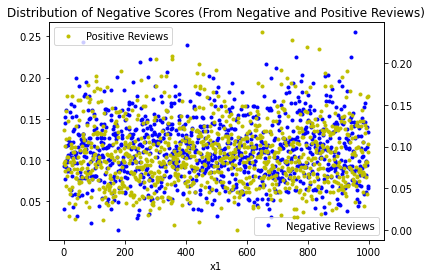

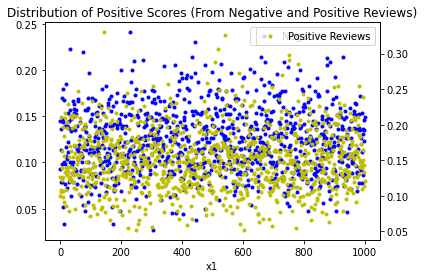

In [7]:
#Plotting the polarity scores and comparing them

df_negative_polarity['x1'] = df_negative_polarity.index
df_positive_polarity['x1'] = df_positive_polarity.index

fig, ax = plt.subplots()
ax2 = ax.twinx()

df_negative_polarity.plot(x='x1', y='Negative', label="Negative Reviews", style='.', ax = ax, color='b')
df_positive_polarity.plot(x='x1', y='Negative', label="Positive Reviews", style='.', ax = ax2, color='y')

plt.title("Distribution of Negative Scores (From Negative and Positive Reviews)")
plt.show()


fig, ax = plt.subplots()
ax2 = ax.twinx()

df_negative_polarity.plot(x='x1', y='Positive', label="Negative Reviews", style='.', ax = ax, color='b')
df_positive_polarity.plot(x='x1', y='Positive', label="Positive Reviews", style='.', ax = ax2, color='y')

plt.title("Distribution of Positive Scores (From Negative and Positive Reviews)")
plt.show()

**Why you think this threshold is reasonable, and the accuracy percentage (how many documents are correctly labeled using this threshold)?**

**ANSWER (THE CONTINUATION OF THE ANSWER IS DOWN BELOW):** As seen in the previous results, the mean of the negative scores from the Negative Reviews are a little higher compared to the mean of the negative scores from the Positive Reviews. Also, the mean of the positive scores from the Positive Reviews are a little higher compared to the mean of the positive scores from the Negative Reviews. Using the STD obtained in each one we can obtain a limit defined for each group.

In other words, to get the majority of documents labeled correctly, the limit defined to be considered a negative review, must be above the mean of the negative scores from the negative review, minus it's STD divided by 2. Same case for the positive reviews.

In [8]:
threshold_negative_reviews = df_negative_polarity['Negative'].mean() - (df_negative_polarity['Negative'].std()/2)
threshold_positive_reviews = df_positive_polarity['Positive'].mean() - (df_positive_polarity['Positive'].std()/2)

print("\033[1mTo be considered as a negative review, it's negative score must be above:\033[0m "+str(threshold_negative_reviews))
print("\033[1mTo be considered as a positive review, it's positive score must be above:\033[0m "+str(threshold_positive_reviews))

To be considered as a negative review, it's negative score must be above: 0.09448091548951655
To be considered as a positive review, it's positive score must be above: 0.1289498294544913


Using the previous **thresholds** to label each review, we can compare the precision and accuracy percentage.

In [17]:
#Gets the number of rows that meets the condition for negative reviews
number_correct_negative_reviews =  len(df_negative_polarity.loc[(df_negative_polarity['Negative'] >= threshold_negative_reviews)])
number_incorrect_negative_reviews = len(df_positive_polarity.loc[(df_positive_polarity['Negative'] >= threshold_negative_reviews)])
precision_negative_reviews = number_correct_negative_reviews/(number_correct_negative_reviews+number_incorrect_negative_reviews)

print("\033[1mResults when using the threshold to get negative reviews:\033[0m \n")
print("\033[1mNumber of documents correctly labeled as negative reviews (Accuracy):\033[0m "+str(number_correct_negative_reviews)+"/"+str(len(df_negative_polarity)))
print("\033[1mNumber of documents incorrectly labeled as negative reviews:\033[0m "+str(number_incorrect_negative_reviews)+"/"+str(len(df_positive_polarity)))
print("\033[1mPrecision when labeling negative reviews (tp/(tp+fp)):\033[0m "+str(precision_negative_reviews)+"\n")

#Gets the number of rows that meets the condition for positive reviews
number_correct_positive_reviews =  len(df_positive_polarity.loc[(df_positive_polarity['Positive'] >= threshold_positive_reviews)])
number_incorrect_positive_reviews = len(df_negative_polarity.loc[(df_negative_polarity['Positive'] >= threshold_positive_reviews)])
precision_positive_reviews = number_correct_positive_reviews/(number_correct_positive_reviews+number_incorrect_positive_reviews)

print("\033[1mResults when using the threshold to get positive reviews:\033[0m \n")
print("\033[1mNumber of documents correctly labeled as positive reviews (Accuracy):\033[0m "+str(number_correct_positive_reviews)+"/"+str(len(df_positive_polarity)))
print("\033[1mNumber of documents incorrectly labeled as positive reviews:\033[0m "+str(number_incorrect_positive_reviews)+"/"+str(len(df_negative_polarity)))
print("\033[1mPrecision when labeling positive reviews (tp/(tp+fp)):\033[0m "+str(precision_positive_reviews))

Results when using the threshold to get negative reviews: 

Number of documents correctly labeled as negative reviews (Accuracy): 679/1000
Number of documents incorrectly labeled as negative reviews: 409/1000
Precision when labeling negative reviews (tp/(tp+fp)): 0.6240808823529411

Results when using the threshold to get positive reviews: 

Number of documents correctly labeled as positive reviews (Accuracy): 675/1000
Number of documents incorrectly labeled as positive reviews: 430/1000
Precision when labeling positive reviews (tp/(tp+fp)): 0.6108597285067874


**ANSWER (CONTINUATION):** As seen in the previous results, we can see that when using the threshold (considering the mean and standard deviation) to label negative and positive reviews, we were able to obtain around 68% for each group (679 for negative reviews and 675 for positive reviews).

When applying the threshold for negative reviews in a dataset for positive reviews, we saw that we were getting around 41% that were labeled as a negative review but actually they were positive reviews. Same case when applying the threshold for positive reviews, in which we were getting around 43% from the negative datasets labeled as a positive review. In both cases, we were able to obtain the majority of documents for each label, around 68%.

## **BONUS EXERCISE**

**Bonus (40 points):** Repeat questions 2,3 and 4 removing all stopwords.

In [ ]:
import nltk
import os
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from IPython.display import display_html
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from IPython.display import clear_output

clear_output()
#Untokenizing the data (Converting back to plain text) with the stop words removed from exercise 1
#The data_reviews_t variable (Obtained from Exercise 1) includes an array...
#...in which each element is a content from a file without stop words
data_reviews_no_stopwords = []
for i in range(len(data_reviews_t)):
    data_reviews_no_stopwords.append(TreebankWordDetokenizer().detokenize(data_reviews_t[i]))


length_data = len(data_reviews_no_stopwords)
length_target = len(target)
middle_index_data = length_data//2
middle_index_target = length_target//2


#Negative reviews data and target
first_half_data = data_reviews_no_stopwords[:middle_index_data]
first_half_target = target[:middle_index_target]

#Positive reviews data and target
second_half_data = data_reviews_no_stopwords[middle_index_data:]
second_half_target = target[middle_index_target:]


#================ MODEL A ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 70% negative and 50% positive
#% of Testing = 30% negative and 50% positive

model_a_negative_training_data, model_a_negative_test_data, model_a_negative_training_target, model_a_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.30, random_state = 12345)
model_a_positive_training_data, model_a_positive_test_data, model_a_positive_training_target, model_a_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.50, random_state = 12345)
#We join both training and test data from positive and negative reviews
model_a_training_data = model_a_negative_training_data + model_a_positive_training_data
model_a_training_target = model_a_negative_training_target + model_a_positive_training_target
model_a_test_data = model_a_negative_test_data + model_a_positive_test_data
model_a_test_target = model_a_negative_test_target + model_a_positive_test_target

model_a = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_a.fit(model_a_training_data, model_a_training_target)

#================ MODEL B ===================
print("Building Multinomial NB Model using TF-IDF...")
#Model = Multinomial NB (TF-IDF)
#% of Training = 50% negative and 70% positive
#% of Testing = 50% negative and 30% positive

model_b_negative_training_data, model_b_negative_test_data, model_b_negative_training_target, model_b_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.50, random_state = 12345)
model_b_positive_training_data, model_b_positive_test_data, model_b_positive_training_target, model_b_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.30, random_state = 12345)
#We join both training data from positive and negative reviews
model_b_training_data = model_b_negative_training_data + model_b_positive_training_data
model_b_training_target = model_b_negative_training_target + model_b_positive_training_target
model_b_test_data = model_b_negative_test_data + model_b_positive_test_data
model_b_test_target = model_b_negative_test_target + model_b_positive_test_target

model_b = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_b.fit(model_b_training_data, model_b_training_target)

#================ MODEL C ===================
print("Building SVM Model using TF-IDF...")
#Model = Support Vector Machines (TF-IDF)
#% of Training = 25% negative and 25% positive
#% of Testing = 75% negative and 75% positive

model_c_negative_training_data, model_c_negative_test_data, model_c_negative_training_target, model_c_negative_test_target = train_test_split(first_half_data, first_half_target, test_size=0.25, random_state = 12345)
model_c_positive_training_data, model_c_positive_test_data, model_c_positive_training_target, model_c_positive_test_target = train_test_split(second_half_data, second_half_target, test_size=0.25, random_state = 12345)
#We join both training data from positive and negative reviews
model_c_training_data = model_c_negative_training_data + model_c_positive_training_data
model_c_training_target = model_c_negative_training_target + model_c_positive_training_target
model_c_test_data = model_c_negative_test_data + model_c_positive_test_data
model_c_test_target = model_c_negative_test_target + model_c_positive_test_target

model_c = make_pipeline(TfidfVectorizer(), SVC())
model_c.fit(model_c_training_data, model_c_training_target)

print("Done!")

df = pd.DataFrame(columns=['Model Name','Accuracy','Precision','Recall','Macro F1-Score'])

print("Evaluating and getting metrics from model A (Multinomial NB TF-IDF)...")
#====== Model A - Multinomial NB TF-IDF (METRICS) ============
model_a_labels = model_a.predict(model_a_test_data)
model_a_accuracy = sklearn.metrics.accuracy_score(model_a_test_target,model_a_labels)
model_a_precision = sklearn.metrics.precision_score(model_a_test_target,model_a_labels)
model_a_recall = sklearn.metrics.recall_score(model_a_test_target,model_a_labels)
model_a_f1 = sklearn.metrics.f1_score(model_a_labels, model_a_test_target, average='macro')

model_a_metrics = ['Model A - Multinomial NB (TF-IDF)',model_a_accuracy,model_a_precision,model_a_recall,model_a_f1]

print("Evaluating and getting metrics from model B (Multinomial NB TF-IDF)...")
#====== Model B - Multinomial NB TF-IDF (METRICS) ============
model_b_labels = model_b.predict(model_b_test_data)
model_b_accuracy = sklearn.metrics.accuracy_score(model_b_test_target,model_b_labels)
model_b_precision = sklearn.metrics.precision_score(model_b_test_target,model_b_labels)
model_b_recall = sklearn.metrics.recall_score(model_b_test_target,model_b_labels)
model_b_f1 = sklearn.metrics.f1_score(model_b_labels, model_b_test_target, average='macro')

model_b_metrics = ['Model B - Multinomial NB (TF-IDF)',model_b_accuracy,model_b_precision,model_b_recall,model_b_f1]

print("Evaluating and getting metrics from model C (SVM TF-IDF)...")
#====== Model C - SVM TF-IDF (METRICS) ============
model_c_labels = model_c.predict(model_c_test_data)
model_c_accuracy = sklearn.metrics.accuracy_score(model_c_test_target,model_c_labels)
model_c_precision = sklearn.metrics.precision_score(model_c_test_target,model_c_labels)
model_c_recall = sklearn.metrics.recall_score(model_c_test_target,model_c_labels)
model_c_f1 = sklearn.metrics.f1_score(model_c_labels, model_c_test_target, average='macro')

model_c_metrics = ['Model C - SVM (TF-IDF)',model_c_accuracy,model_c_precision,model_c_recall,model_c_f1]

print("Done! \n")

#Adding the previous metrics to a dataframe

df.loc[len(df), :] = model_a_metrics
df.loc[len(df), :] = model_b_metrics
df.loc[len(df), :] = model_c_metrics

df

Building Multinomial NB Model using TF-IDF...
Building Multinomial NB Model using TF-IDF...
Building SVM Model using TF-IDF...
Done!
Evaluating and getting metrics from model A (Multinomial NB TF-IDF)...
Evaluating and getting metrics from model B (Multinomial NB TF-IDF)...
Evaluating and getting metrics from model C (SVM TF-IDF)...
Done! 



,Model Name,Accuracy,Precision,Recall,Macro F1-Score
0,Model A - Multinomial NB (TF-IDF),0.39875,1,0.038,0.31413
1,Model B - Multinomial NB (TF-IDF),0.385,0.378481,0.996667,0.291959
2,Model C - SVM (TF-IDF),0.84,0.84,0.84,0.84


Answer the following questions: 

**Did this change the results in any way?** The metrics from the Exercise 3 and the current exercise doesn't have considerable differences when comparing them. We still see that the Model C has a similar accurracy, and we still see similar precision and recall scores from Models A and B.

**Why do you think so?** Because the stops words can be either presented in both positive and negative reviews data sets, and deleting them, doesn't make any considerable differences when comparing the metrics for each model between Exercise 3 and this exercise. If we delete words like "bad, good, awesome, sucks, terrible, terrific", we would be able to see considerable differences in the results because each of the words in the previous example can be used more in one data set than in the other. For example, deleting the words like "bad, sucks, terrible, worst", in which according to exercise 1, "bad" was one of the most used words in the negative reviews dataset, thus we would see a noticeable difference compared to the results obtained from the models from Exercise 2 and 3.

**Questions from Exercise 4 for the BONUS Exercise**

**a) What is the best performing model?** The best performing model even in the bonus exercise is the Model C (SVM with TF-IDF)

**b) Why do you think this is the best performing model?** Because their classes are well balanced (25% for each class, and as we know, the classifier tries to guess the majority class, in which it is not seen for model C) and because that model has a high accuracy score. That means that when predicting a text using this model, the probability to labeling it correctly will be higher comparing to the other two models (A and B).

**c) How does class imbalance play in determining polarity?** This case was still seen in the bonus exercise in the first two models: A and B. Having datasets for training with a class imbalance within each other, will lead to have a very low accuracy, as seen in the results from the Model A and B. That's why is important to have our training data set well balanced within all the classes. As seen in the bonus exercise, since class imbalance was still present, even after removing the stop words, no significant difference was seen in their metrics.

**d) Do you think either more data or a better model is a better approach for this kind of task?** I will keep the same answer regarding exercise 4, since adding more data doesn't always mean that the model will be more efficient. It can reach a point where, because of having so much data, there could be some disambiguation, and thus, getting results with less accuracy. Additionally, regarding the bonus exercise, it can be infered that modifying the data in both datasets (like deleting stop words from negative and positive reviews) didn't affect significantly the results from any of the models if compared to the ones from Exercise 4. Based on the results from Exercise 4 and the bonus exercise, I'm still convinced that oversampling the minority class would solve the problem with imbalanced classes.